In [3]:
pip install surprise

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
from surprise import Dataset, Reader
from surprise import SVDpp, SVD, NMF
from surprise.model_selection import train_test_split, cross_validate, GridSearchCV
from surprise import accuracy


data = Dataset.load_builtin('ml-100k')
data

Dataset ml-100k could not be found. Do you want to download it? [Y/n] y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /Users/V/.surprise_data/ml-100k


In [5]:

# Run 5-fold cross-validation SVD and print results.
cvd_results = cross_validate(SVD(), data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

print("Mean RMSE: {:.4f}".format(np.mean(cvd_results['test_rmse'])))
print("Mean MAE: {:.4f}".format(np.mean(cvd_results['test_mae'])))
print("Mean fit time: {:.4f}".format(np.mean(cvd_results['fit_time'])))
print("Mean test time: {:.4f}".format(np.mean(cvd_results['test_time'])))

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9332  0.9316  0.9306  0.9340  0.9437  0.9346  0.0047  
MAE (testset)     0.7371  0.7328  0.7330  0.7375  0.7445  0.7370  0.0043  
Fit time          0.97    1.15    0.85    0.80    0.80    0.91    0.13    
Test time         0.28    0.19    0.11    0.16    0.11    0.17    0.06    
Mean RMSE: 0.9346
Mean MAE: 0.7370
Mean fit time: 0.9142
Mean test time: 0.1719


In [6]:
# Run 5-fold cross-validation SVDpp and print results.
cvdpp_results = cross_validate(SVDpp(), data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

print("Mean RMSE: {:.4f}".format(np.mean(cvdpp_results['test_rmse'])))
print("Mean MAE: {:.4f}".format(np.mean(cvdpp_results['test_mae'])))
print("Mean fit time: {:.4f}".format(np.mean(cvdpp_results['fit_time'])))
print("Mean test time: {:.4f}".format(np.mean(cvdpp_results['test_time'])))
     

Evaluating RMSE, MAE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9266  0.9132  0.9201  0.9159  0.9235  0.9199  0.0049  
MAE (testset)     0.7281  0.7158  0.7216  0.7170  0.7246  0.7214  0.0046  
Fit time          16.03   14.96   14.74   14.58   14.76   15.01   0.52    
Test time         3.36    3.50    3.19    3.45    3.26    3.35    0.12    
Mean RMSE: 0.9199
Mean MAE: 0.7214
Mean fit time: 15.0138
Mean test time: 3.3499


In [7]:
# Run 5-fold cross-validation NMF and print results.
nmf_results = cross_validate(NMF(), data, measures=['rmse', 'mae'], cv=5, verbose=True)

print("Mean RMSE: {:.4f}".format(np.mean(nmf_results['test_rmse'])))
print("Mean MAE: {:.4f}".format(np.mean(nmf_results['test_mae'])))
print("Mean fit time: {:.4f}".format(np.mean(nmf_results['fit_time'])))
print("Mean test time: {:.4f}".format(np.mean(nmf_results['test_time'])))

Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9602  0.9700  0.9640  0.9697  0.9593  0.9646  0.0045  
MAE (testset)     0.7553  0.7623  0.7555  0.7635  0.7542  0.7582  0.0039  
Fit time          1.57    1.68    1.50    1.68    1.72    1.63    0.08    
Test time         0.17    0.11    0.16    0.11    0.17    0.15    0.03    
Mean RMSE: 0.9646
Mean MAE: 0.7582
Mean fit time: 1.6315
Mean test time: 0.1460


In [8]:

rmse_results = {
    'SVD': np.mean(cvd_results['test_rmse']),
    'SVD++': np.mean(cvdpp_results['test_rmse']),
    'NMF': np.mean(nmf_results['test_rmse'])
}

# Визначення алгоритму з найменшим RMSE
best_algorithm = min(rmse_results, key=rmse_results.get)

print(f"Найкращий алгоритм: {best_algorithm} з RMSE = {rmse_results[best_algorithm]:.4f}")


Найкращий алгоритм: SVD++ з RMSE = 0.9199


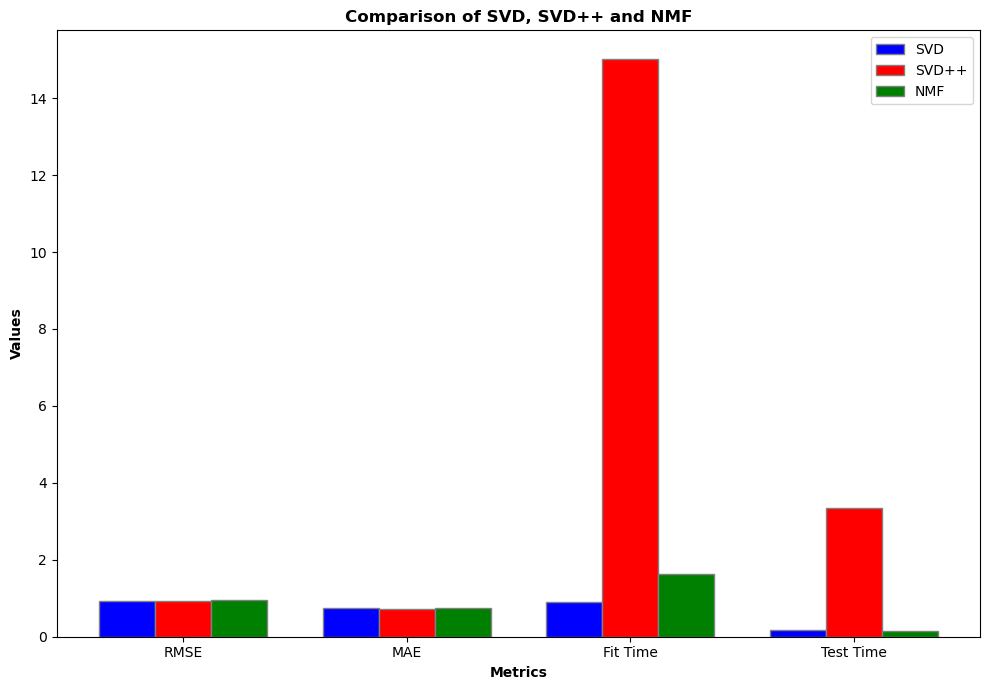

In [9]:
import matplotlib.pyplot as plt

metrics = ['RMSE', 'MAE', 'Fit Time', 'Test Time']
values_svd = [np.mean(cvd_results['test_rmse']),
              np.mean(cvd_results['test_mae']),
              np.mean(cvd_results['fit_time']),
              np.mean(cvd_results['test_time'])]

values_svdpp = [np.mean(cvdpp_results['test_rmse']),
                np.mean(cvdpp_results['test_mae']),
                np.mean(cvdpp_results['fit_time']),
                np.mean(cvdpp_results['test_time'])]

values_nmf = [np.mean(nmf_results['test_rmse']),
              np.mean(nmf_results['test_mae']),
              np.mean(nmf_results['fit_time']),
              np.mean(nmf_results['test_time'])]

bar_width = 0.25
r1 = np.arange(len(values_svd))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(figsize=(10,7))
plt.bar(r1, values_svd, width=bar_width, color='blue', edgecolor='grey', label='SVD')
plt.bar(r2, values_svdpp, width=bar_width, color='red', edgecolor='grey', label='SVD++')
plt.bar(r3, values_nmf, width=bar_width, color='green', edgecolor='grey', label='NMF')

plt.title('Comparison of SVD, SVD++ and NMF', fontweight='bold')
plt.xlabel('Metrics', fontweight='bold')
plt.ylabel('Values', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(values_svd))], metrics)
plt.legend()

plt.tight_layout()
plt.show()

SVD++ маює найнижчі значення RMSE та MAE, але він найбільш витратний по часу виконання.